Text(0.5, 1.0, 'sensitivity of Unmatched SV pipeline, n=995')

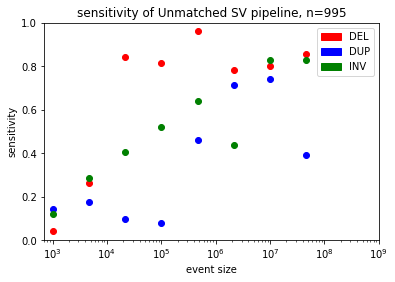

In [3]:
import pandas as pd
import numpy
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

sizes = [int(i) for i in numpy.logspace(3, 9, num=10)]
color = {'DEL': 'red', 'DUP': 'blue', 'INV': 'green'}
files = {
    'DEL': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DEL_DETECT_noBLACK.tsv",
    'DUP': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DUP_DETECT_noBLACK.tsv",
    'INV': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_INV_DETECT.tsv",
}

total_calls = 0
for key, file in files.items():

    raw_df = pd.read_csv(file, sep='\t')
    total_calls += len(raw_df)

    sens = len(raw_df[raw_df['Detection']=='Detected']) / len(raw_df)
    raw_df['binned'] = pd.cut(raw_df['SV length'], sizes)
    bins = raw_df['binned'].unique()
    for bin in bins:
        df = raw_df[raw_df['binned']==bin]
        gb = df.groupby('Sample')
        for name, group in gb:
            if len(group) >= 5:
                sens = len(group[group['Detection']=='Detected']) / len(group)
#                 plt.scatter(bin.left, sens, color=color[key], alpha=0.3)
        if len(df) >=5 :
            sens = len(df[df['Detection']=='Detected']) / len(df)
            plt.scatter(bin.left, sens, color=color[key])
    plt.xscale('log')
    plt.xlim(sizes[0]*0.7, sizes[-1])
    plt.ylim(0,1)
    plt.xlabel("event size")
    plt.ylabel("sensitivity")
    plt.title("")
    
color_handles = []
for key, value in color.items():
    color_handles.append(
        mpatches.Patch(color=value,label=key)
    )
plt.legend(handles=color_handles)
plt.title(f'sensitivity of Unmatched SV pipeline, n={total_calls}')

Text(0.5, 0.98, 'sensitivity of Unmatched SV pipeline, n=995')

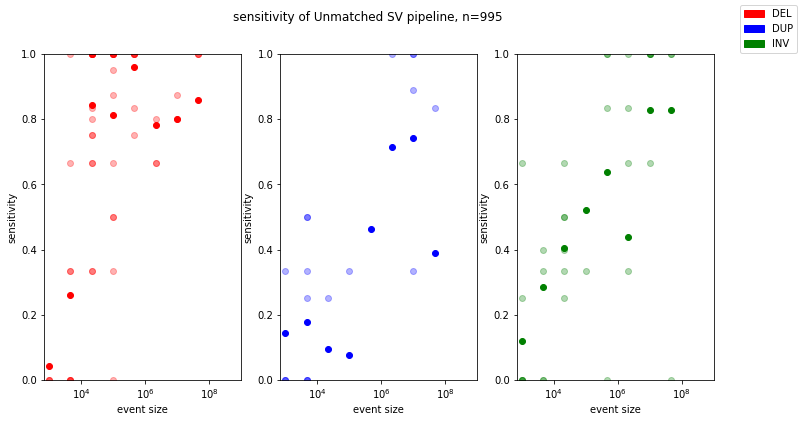

In [4]:

sizes = [int(i) for i in numpy.logspace(3, 9, num=10)]
color = {'DEL': 'red', 'DUP': 'blue', 'INV': 'green'}
files = {
    'DEL': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DEL_DETECT_noBLACK.tsv",
    'DUP': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DUP_DETECT_noBLACK.tsv",
    'INV': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_INV_DETECT.tsv",
}

fig, ax = plt.subplots(1, 3, figsize=(12,6))


total_calls = 0
for i, (key, file) in enumerate(files.items()):

    raw_df = pd.read_csv(file, sep='\t')
    total_calls += len(raw_df)

    sens = len(raw_df[raw_df['Detection']=='Detected']) / len(raw_df)
    raw_df['binned'] = pd.cut(raw_df['SV length'], sizes)
    bins = raw_df['binned'].unique()
    for bin in bins:
        df = raw_df[raw_df['binned']==bin]
        gb = df.groupby('Sample')
        for name, group in gb:
            if len(group) >= 3:
                sens = len(group[group['Detection']=='Detected']) / len(group)
                ax[i].scatter(bin.left, sens, color=color[key], alpha=0.3)
        if len(df) >=5 :
            sens = len(df[df['Detection']=='Detected']) / len(df)
            ax[i].scatter(bin.left, sens, color=color[key])
    ax[i].set_xscale('log')
    ax[i].set_xlim([sizes[0]*0.7, sizes[-1]])
    ax[i].set_ylim([0,1])
    ax[i].set_xlabel("event size")
    ax[i].set_ylabel("sensitivity")
    
color_handles = []
for key, value in color.items():
    color_handles.append(
        mpatches.Patch(color=value,label=key)
    )
fig.legend(handles=color_handles)
fig.suptitle(f'sensitivity of Unmatched SV pipeline, n={total_calls}')

Text(0.5, 0.98, 'sensitivity of Unmatched SV pipeline, n=995')

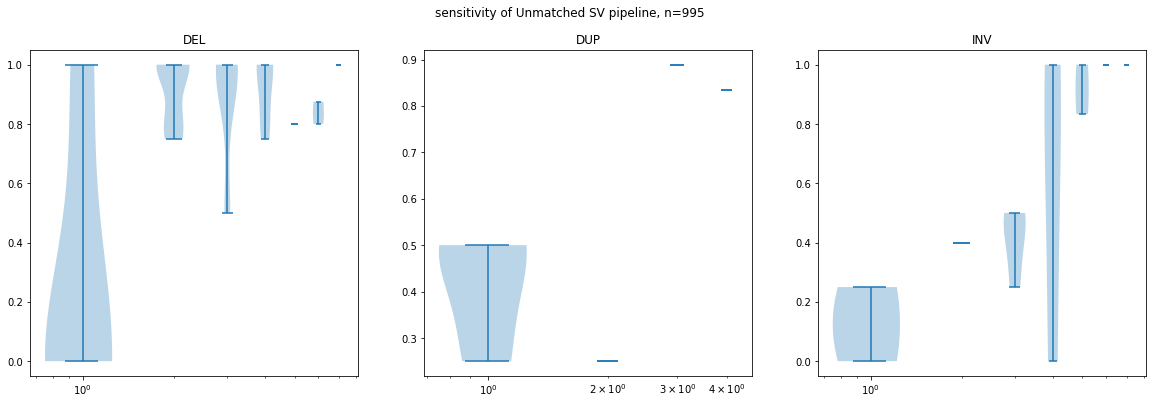

In [97]:
sizes = [int(i) for i in numpy.logspace(3, 9, num=10)]
color = {'DEL': 'red', 'DUP': 'blue', 'INV': 'green'}
files = {
    'DEL': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DEL_DETECT_noBLACK.tsv",
    'DUP': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_DUP_DETECT_noBLACK.tsv",
    'INV': "/work/isabl/home/gutierj2/uk_all/joe_files_svs/tinder_full_set_INV_DETECT.tsv",
}


results = {
    "DEL": {k:[] for k in sizes},
    "DUP": {k:[] for k in sizes},
    "INV": {k:[] for k in sizes},
}

fig, ax = plt.subplots(1, 3, figsize=(20,6))

total_calls = 0
for i, (key, file) in enumerate(files.items()):

    raw_df = pd.read_csv(file, sep='\t')
    total_calls += len(raw_df)

    sens = len(raw_df[raw_df['Detection']=='Detected']) / len(raw_df)
    raw_df['binned'] = pd.cut(raw_df['SV length'], sizes)
    bins = raw_df['binned'].unique()
    for bin in bins:
        df = raw_df[raw_df['binned']==bin]
        gb = df.groupby('Sample')
        for name, group in gb:
            if len(group) >= 4:
                sens = len(group[group['Detection']=='Detected']) / len(group)
                results[key][bin.left].append(sens)
#         if len(df) >=5 :
#             sens = len(df[df['Detection']=='Detected']) / len(df)
#             ax[i].scatter(bin.left, sens, color=color[key])
#     ax[i].set_xscale('log')
#     ax[i].set_xlim([sizes[0]*0.7, sizes[-1]])
#     ax[i].set_ylim([0,1])
#     ax[i].set_xlabel("event size")
#     ax[i].set_ylabel("sensitivity")

for i, (key, value) in enumerate(results.items()):
    ls = []
    for bin, l in value.items():
        ls.append(l)
    ls = [i for i in ls if i]
    ax[i].violinplot(ls)
#     ax[i].boxplot(ls, positions=sizes, widths=sizes)
    ax[i].set_xscale('log')
    ax[i].title.set_text(key)


fig.suptitle(f'sensitivity of Unmatched SV pipeline, n={total_calls}')

In [95]:
for i in ls:
    print(len(i))

3
8
17
14
7
3
2
3
0
0


In [10]:
bins

[(21544.0, 100000.0], (100000.0, 464158.0], (1000.0, 4641.0], (464158.0, 2154434.0], (2154434.0, 10000000.0], (4641.0, 21544.0], (10000000.0, 46415888.0], NaN, (46415888.0, 215443469.0]]
Categories (8, interval[int64]): [(1000, 4641] < (4641, 21544] < (21544, 100000] < (100000, 464158] < (464158, 2154434] < (2154434, 10000000] < (10000000, 46415888] < (46415888, 215443469]]